In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.api.types import is_string_dtype
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
from collections import defaultdict
from copy import deepcopy
from itertools import chain

sns.set()

In [136]:
df = pd.read_csv('data/responses.csv')
df = df.fillna(-1.0)
df.shape

(1010, 150)

In [137]:
def map_data_to_numeric_values(df):
  replace_dict = {}
  for col in df.columns:
    if is_string_dtype(df[col]):
      unique_values = df[col].unique()
      replace_dict[col] = dict(zip(unique_values, range(len(unique_values))))
  return df.replace(replace_dict)

df = map_data_to_numeric_values(df)
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,...,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,...,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,0,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,0,0,0,0,0,0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,...,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,0,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,0,0,0,0,1,0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,...,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,0,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,0,0,1,0,1,0
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0,5.0,4.0,4.0,3.0,3.0,4.0,3.0,1.0,2.0,5.0,1.0,2.0,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,...,1.0,5.0,3.0,1.0,3.0,3.0,2.0,5.0,5.0,4.0,5.0,3.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,-1.0,2.0,4.0,1,2.0,4.0,3.0,3.0,4.0,4,1.0,22.0,172.0,59.0,1.0,0,0,0,1,1,1
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,3.0,1.0,4.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,...,4.0,2.0,3.0,3.0,3.0,3.0,5.0,4.0,2.0,3.0,5.0,5.0,2.0,3.0,5.0,3.0,3.0,2.0,4.0,3.0,3.0,3.0,0,4.0,3.0,4.0,3.0,3.0,2,4.0,20.0,170.0,59.0,1.0,0,0,1,0,0,1


In [138]:
categories = {}

categories['Music'] = df.columns[range(19)]
categories['Movies'] = df.columns[range(19,31)]
categories['Hobbies'] = df.columns[range(31,63)]
categories['Phobias'] = df.columns[range(63,73)]
categories['Health'] = df.columns[range(73,76)]
categories['Personality'] = df.columns[list(range(76,103)) + list(range(104, 133))] # without 'God' column
categories['Habits'] = df.columns[range(133,140)]
categories['Demografics'] = df.columns[range(140,150)]

# I believe in god.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
target = df['God']
target

0       1.0
1       1.0
2       5.0
3       4.0
4       5.0
       ... 
1005    3.0
1006    5.0
1007    1.0
1008    2.0
1009    1.0
Name: God, Length: 1010, dtype: float64

In [139]:
believer_mean = np.mean(target)
believer_mean

3.294059405940594

In [140]:
god = deepcopy(df.loc[df['God'] > believer_mean])
god.shape

(483, 150)

In [141]:
believer = deepcopy(df.loc[df['God'] > believer_mean])
non_believer = deepcopy(df.loc[df['God'] <= believer_mean])
non_believer.shape

(527, 150)

In [142]:
binary_target = deepcopy(target)
binary_target[target <= believer_mean] = 0
binary_target[target > believer_mean] = 1
binary_target

0       0.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
1005    0.0
1006    1.0
1007    0.0
1008    0.0
1009    0.0
Name: God, Length: 1010, dtype: float64

In [143]:
for cat_name, cat_cols in categories.items():
    data = deepcopy(df[cat_cols])
    ss = StandardScaler()
    ss.fit(data)
    data = ss.transform(data)
    logistic_regression = LogisticRegression(C=0.01)
    scores = cross_val_score(logistic_regression, data, binary_target, cv=6)
    print(cat_name, np.mean(scores))

Music 0.5801810369118061
Movies 0.5812024513947591
Hobbies 0.7010190664036818
Phobias 0.5712994270686579
Health 0.5366828684136377
Personality 0.67227857612473
Habits 0.5703719357565512
Demografics 0.5831689677843523


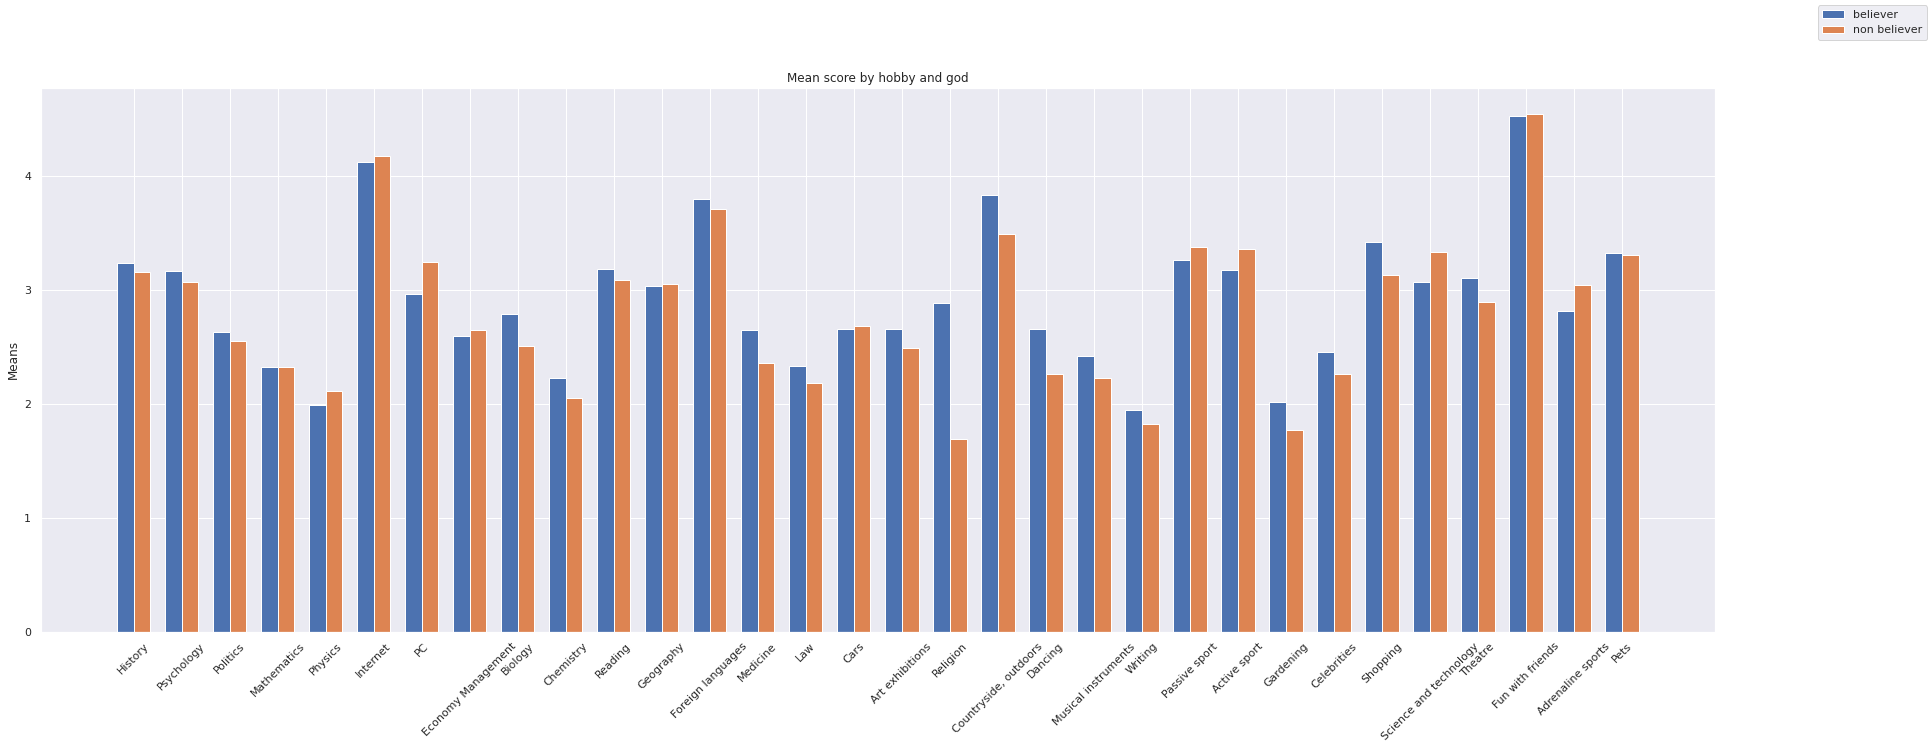

In [144]:
believer_hobbies = believer[categories['Hobbies']]
non_believer_hobbies = non_believer[categories['Hobbies']]

believer_hobbies_avg = np.mean(believer_hobbies, axis=0)
non_believer_hobbies_avg = np.mean(non_believer_hobbies, axis=0)

ind = np.arange(len(believer_hobbies_avg))  # the x locations for the groups
width = 0.35
fig, ax = plt.subplots(figsize=(30,10))
rects1 = ax.bar(ind - width/2, believer_hobbies_avg, width, label='believer')
rects2 = ax.bar(ind + width/2, non_believer_hobbies_avg, width, label='non believer')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Means')
ax.set_title('Mean score by hobby and god')
ax.set_xticks(ind)
ax.set_xticklabels(categories['Hobbies'], rotation=45)
fig.legend()
fig.show()